In [5]:
import pandas as pd
from ivpy import attach,show,montage,histogram,scatter

In [6]:
DIR = "/Users/damoncrockett/ivpy-datasets/vangogh/"
df = pd.read_csv(DIR+"images.csv")

In [7]:
df.Filename = [DIR+item for item in df.Filename]

In [8]:
attach(df,'Filename')

# histogram( )

With the histogram, we introduce, at last, a proper data _axis_, and thus a _coordinate system_. Everything about the histogram that distinguishes it from a simple montage arises from this difference. Indeed, an image histogram is just a sequence of columnar montages plotted along a binned axis.

### xcol and bins

Although we've used 'xcol' before, it functions slightly differently in a histogram. Here, it specifies the histogram axis: the one whose values are binned to produce columns of datapoints. Without this axis, we'd have no rule to order the columns, and we'd have made no advancement on our simple montage. Accordingly, we _must_ specify 'xcol'.

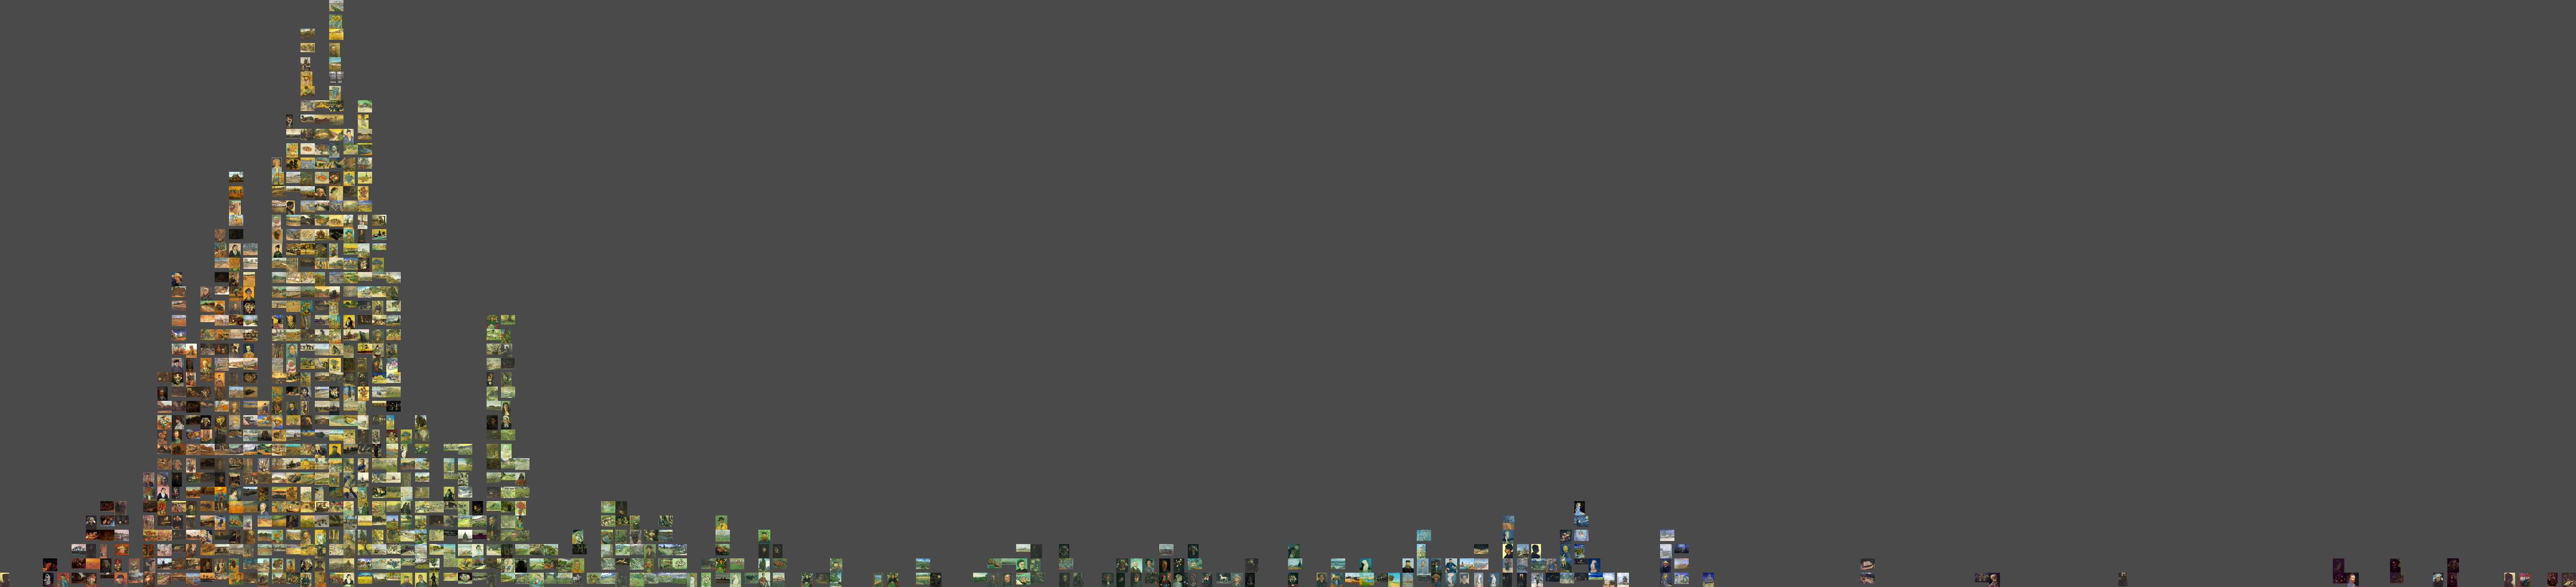

In [15]:
histogram(xcol='hue_peak',bins=180)

If we assign an integer _n_ to 'bins', the code will produce _n_ equal-width bins. We can, alternatively, assign to 'bins' a sequence of bin edges, and they can be spaced however we like. Let's try to gather up that long tail on the right: 

In [19]:
from numpy import arange

In [27]:
pretail = list(arange(0,92,2))
tail = list(arange(92,380,20))
binedges = pretail + tail

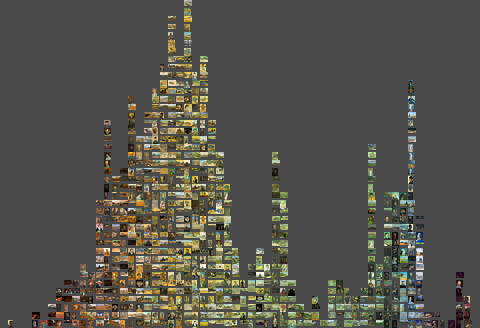

In [31]:
histogram(xcol='hue_peak',bins=binedges,thumb=8)

Be careful here, however, because viewers will assume the bins are evenly-spaced.

### ycol and ascending

We said above that 'xcol', in effect, sorts columnar montages along an axis. But we know montages can themselves be sorted. So, how do we do that? Why, with 'ycol'! Histogram columns are sorted vertically by whatever column we assign to 'ycol', and the 'ascending' argument now controls _this_ sorting (in fact, we cannot invert the ordering of xcol at all, because I decided that would dangerous).

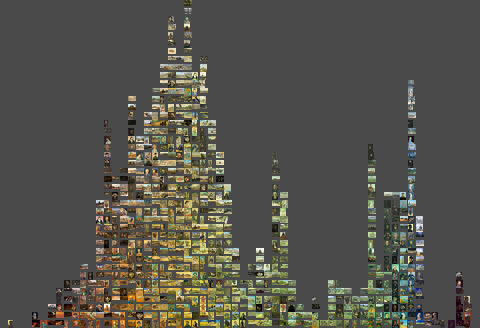

In [33]:
histogram(xcol='hue_peak',bins=binedges,thumb=8,ycol='Saturation_Median')

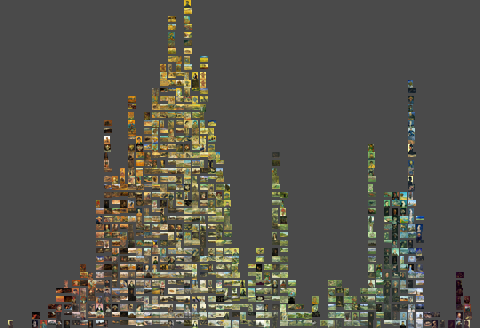

In [34]:
histogram(xcol='hue_peak',bins=binedges,thumb=8,ycol='Saturation_Median',ascending=True)

### coordinates

Just as montage( ) has rectilinear and polar forms, histogram( ) has Cartesian and polar coordinate systems. The default is Cartesian, as it should be, since most variables are linear in nature. But hue, which we used above, is a circular property. Hues are ordered, but no hue is any "higher" or "lower" than any other. Hue is thus better represented in polar coordinates:

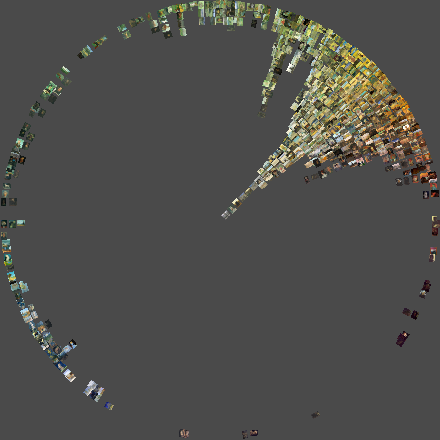

In [35]:
histogram(xcol='hue_peak',thumb=8,ycol='Saturation_Median',coordinates='polar',bins=360)

### xdomain and facetcol

Whatever we assign to 'bins', it will stay fixed across all facets. This is by design, so that facets are consistent and can be compared easily. 